In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [3]:
columns = ['user_id','order_day','order_number','order_price']
data = pd.read_table('CDNOW.txt',names = columns,sep="\s+")
data.head()

,user_id,order_day,order_number,order_price
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [4]:
data.describe()

,user_id,order_day,order_number,order_price
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id         69659 non-null int64
order_day       69659 non-null int64
order_number    69659 non-null int64
order_price     69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [6]:
from datetime import datetime
data['order_date'] = pd.to_datetime(data.order_day,format = '%Y%m%d')
#pd.to_datetime将特定的字符串或者数字转换成时间格式
data['month'] = data.order_date.astype('datetime64[M]')
#astype将时间格式装换，[M]转换成月份。将日期化作月份处理数据

In [7]:
data.head()

,user_id,order_day,order_number,order_price,order_date,month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


In [8]:
user_grouped = data.groupby('user_id').sum()
user_grouped.head()

,order_day,order_number,order_price
user_id,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61


In [9]:
user_grouped.describe()

,order_day,order_number,order_price
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


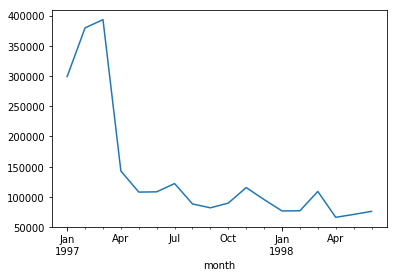

In [11]:
#以月份为窗口对其进行透视
data.groupby('month').order_price.sum().plot()

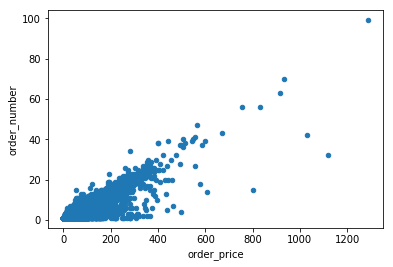

In [12]:
data.plot.scatter(x = 'order_price' ,y = 'order_number')
#每笔订单的散点图

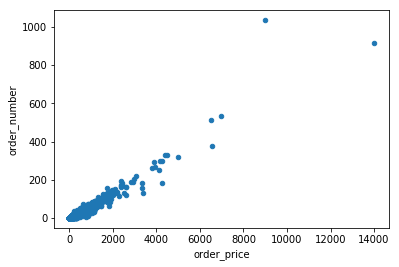

In [13]:
data.groupby('user_id').sum().plot.scatter(
    x = 'order_price', y = 'order_number')

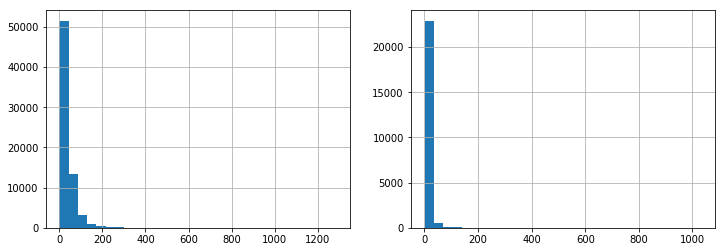

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))
plt.subplot(121)
data.order_price.hist(bins = 30)
plt.subplot(122)
data.groupby('user_id').order_number.sum().hist(bins = 30)

In [15]:
data.groupby('user_id').month.min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [16]:
data.groupby('user_id').month.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

In [17]:
pivoted_counts = data.pivot_table(index = 'user_id', 
                                columns = 'month', 
                                values = 'order_day',
                                aggfunc = 'count').fillna(0) 
columns_month = data.month.sort_values().astype('str').unique() 
pivoted_counts.columns = columns_month 
pivoted_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
pivoted_counts_transf = pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)
pivoted_counts_transf.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


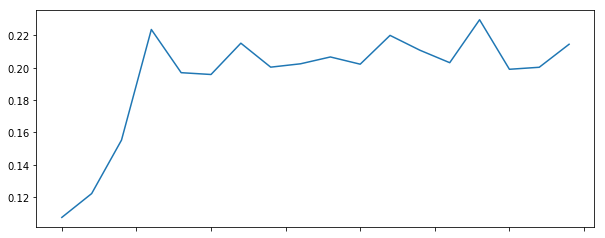

In [19]:
(pivoted_counts_transf.sum()/pivoted_counts_transf.count()).plot(
    figsize = (10,4))

In [20]:
#由上图可以看出，在开始阶段，由于新用户的大量加入，早期新客的复购率并不高，
#但随着时间的推移，出现比较多忠诚的老顾客，复购率上升，维持在20%左右。

In [21]:
pivoted_amount = data.pivot_table(index = 'user_id', 
                                columns = 'month',
                                values = 'order_price',
                                aggfunc = 'mean').fillna(0) 
columns_month = data.month.sort_values().astype('str').unique() 
pivoted_amount.columns = columns_month 
pivoted_amount.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [22]:
pivoted_purchase = pivoted_amount.applymap(lambda x:1 if x> 0 else 0)
pivoted_purchase.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [23]:
#复购率函数
def purchase_return(data): 
    status = [] 
    for i in range(17): 
        if data[i] == 1: 
            if data[i+1] == 1: 
                status.append(1) 
            if data[i+1] == 0: 
                status.append(0) 
        else: 
            status.append(np.NaN)
    status.append(np.NaN)
    return status
from pandas import DataFrame
pivoted_purchase_return = pivoted_purchase.apply(purchase_return, axis = 1)
#此时输出为Series，需要将其转化为DataFrame类型，相应设置index和columns
columns_month = data.month.sort_values().astype('str').unique()
user_id = pivoted_purchase.index
pivoted_purchase_return1 = pd.DataFrame(list(pivoted_purchase_return),columns = columns_month, index = user_id)
#Series转化为Dataframe的方法：先转化为list类型，再转化为DataFrame，期间可传入columns
pivoted_purchase_return1.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


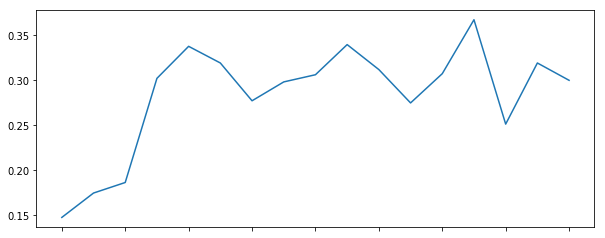

In [24]:
pivoted_purchase_return1.mean().plot(figsize = (10,4))

In [25]:
def active_ststus(data): 
    status = [] 
    for i in range(18): 
        #若本月没有消费 
        if data[i] == 0: 
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg') 
                else: 
                    status.append('unactive') 
            else: 
                status.append('unreg')
        #若本月有消费 
        else: 
            if len(status) == 0: 
                status.append('new') 
            else: 
                if status[i-1] == 'unactive': 
                    status.append('return') 
                elif status[i-1] == 'unreg':
                    status.append('new') 
                else:
                    status.append('active') 
    return status
pivoted_purchase_status = pivoted_purchase.apply(lambda x: active_ststus(x), axis = 1) 
#此时输出为Series，需要将其转化为DataFrame类型，相应设置index和columns 
columns_month = data.month.sort_values().astype('str').unique() 
user_id = pivoted_purchase.index 
pivoted_purchase_status1 = pd.DataFrame(list(pivoted_purchase_status),columns = columns_month, index = user_id) 
pivoted_purchase_status1.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [26]:
purchase_status1_counts = pivoted_purchase_status1.replace('unreg', np.NaN).apply(pd.value_counts) 
#此时apply是在列上执行运算 #把unreg状态排除掉，他是未来作为新客，只是一个暂时状态。然后计算不同分层每月的统计量 
purchase_status1_counts

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1155.0,1680,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624,632.0,512.0,472.0,569.0,517.0,458.0,446.0
new,7814.0,8455.0,7231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1402,1232.0,1025.0,1079.0,1489.0,919.0,1030.0,1060.0
unactive,NaN,6659.0,13994,20678.0,21286.0,21161.0,21320.0,21728.0,21761.0,21661.0,21474,21638.0,21965.0,21951.0,21444.0,22066.0,22014.0,21996.0


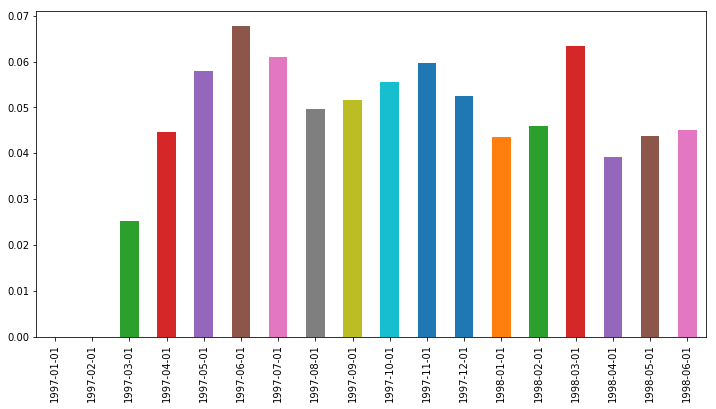

In [27]:
return_rate = purchase_status1_counts.apply(lambda x: x/x.sum())
return_rate.loc['return'].plot.bar(figsize = (12,6)) #每个月回流用户的占比

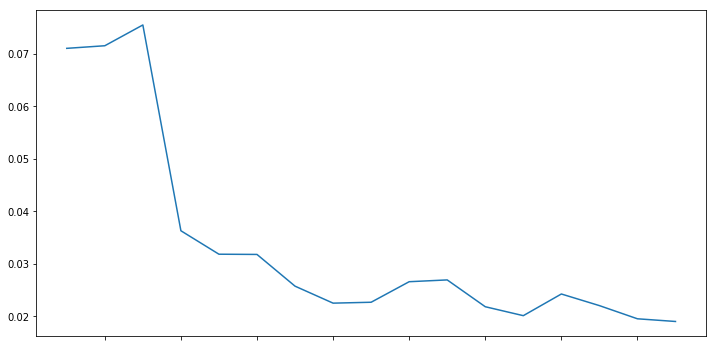

In [28]:
return_rate.loc['active'].plot(figsize = (12,6)) 

In [29]:
user_amount = data.groupby('user_id').order_price.sum().sort_values().reset_index() 
user_amount['amount_cumsum'] = user_amount.order_price.cumsum() 
user_amount.tail()

,user_id,order_price,amount_cumsum
23565,7931,6497.18,2463822.60
23566,19339,6552.70,2470375.30
23567,7983,6973.07,2477348.37
23568,14048,8976.33,2486324.70
23569,7592,13990.93,2500315.63


In [30]:
amount_total = user_amount.amount_cumsum.max() 
user_amount['prop'] = user_amount.apply(lambda x: x.amount_cumsum/amount_total, axis = 1) 
user_amount.tail()

,user_id,order_price,amount_cumsum,prop
23565,7931,6497.18,2463822.60,0.985405
23566,19339,6552.70,2470375.30,0.988025
23567,7983,6973.07,2477348.37,0.990814
23568,14048,8976.33,2486324.70,0.994404
23569,7592,13990.93,2500315.63,1.000000


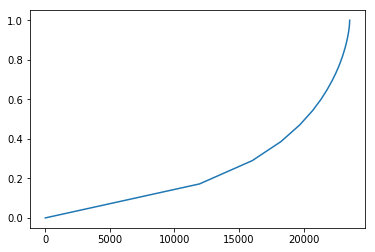

In [31]:
#同理，观察订单数量这个维度：
user_counts = data.groupby('user_id').order_day.count().sort_values().reset_index() 
user_counts['counts_cumsum'] = user_counts.order_day.cumsum() 
counts_total = user_counts.counts_cumsum.max() 
user_counts['prop'] = user_counts.apply(lambda x: 
                                        x.counts_cumsum/counts_total, 
                                        axis = 1) 
user_counts.prop.plot()